# Print the Tokens Generated via GPT2

In [1]:
from transformers import GPT2Tokenizer

# Initialize GPT-3 tokenizer (GPT-3 uses GPT-2 tokenizer in the transformers library)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

text = "In Cloud, we use s3 buckets to keep the unstructured data."

# Tokenize the text
tokens = tokenizer.tokenize(text)
print(tokens)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

['In', 'ĠCloud', ',', 'Ġwe', 'Ġuse', 'Ġs', '3', 'Ġbuckets', 'Ġto', 'Ġkeep', 'Ġthe', 'Ġun', 'struct', 'ured', 'Ġdata', '.']


# Print the Tokens IDs Generated via GPT2

In [3]:
from transformers import GPT2Tokenizer

# Initialize GPT-3 tokenizer (GPT-3 uses GPT-2 tokenizer in the transformers library)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

text = "In Cloud, we use s3 buckets to keep the unstructured data."

# Tokenize the text and get token IDs
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print (token_ids)

# Print tokens and their corresponding IDs
for token, token_id in zip(tokens, token_ids):
    print(f"Token: {token}, Token ID: {token_id}")

[818, 10130, 11, 356, 779, 264, 18, 38674, 284, 1394, 262, 555, 7249, 1522, 1366, 13]
Token: In, Token ID: 818
Token: ĠCloud, Token ID: 10130
Token: ,, Token ID: 11
Token: Ġwe, Token ID: 356
Token: Ġuse, Token ID: 779
Token: Ġs, Token ID: 264
Token: 3, Token ID: 18
Token: Ġbuckets, Token ID: 38674
Token: Ġto, Token ID: 284
Token: Ġkeep, Token ID: 1394
Token: Ġthe, Token ID: 262
Token: Ġun, Token ID: 555
Token: struct, Token ID: 7249
Token: ured, Token ID: 1522
Token: Ġdata, Token ID: 1366
Token: ., Token ID: 13


# Print the static vector associated with a TokenID

In [5]:
import torch
from transformers import GPT2Tokenizer, GPT2Model, GPT2LMHeadModel

# Initialize GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

text = "In Cloud, we use s3 buckets to keep the unstructured data."

# Tokenize the text
input_ids = tokenizer(text, return_tensors='pt')['input_ids']

# Get the embeddings from the embedding layer
with torch.no_grad():
    embeddings = model.transformer.wte(input_ids)

# Print token IDs and corresponding embeddings
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
for token, token_id, embedding in zip(tokens, input_ids[0], embeddings[0]):
    print(f"Token: {token}, Token ID: {token_id}, Embedding: {embedding.numpy()[:5]}...")  # Print first 5 values of the embedding for brevity


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Token: In, Token ID: 818, Embedding: [-0.00971996 -0.08187979  0.10678107  0.04152476 -0.12342919]...
Token: ĠCloud, Token ID: 10130, Embedding: [ 0.21722645  0.00647306  0.22365688 -0.0554665  -0.06537857]...
Token: ,, Token ID: 11, Embedding: [ 0.01149669 -0.00294905  0.03231413  0.05518324  0.05239208]...
Token: Ġwe, Token ID: 356, Embedding: [-0.0389614   0.00469847  0.06234708  0.10450594  0.05062747]...
Token: Ġuse, Token ID: 779, Embedding: [ 0.01596787 -0.28450435  0.12097215  0.0432267  -0.24049152]...
Token: Ġs, Token ID: 264, Embedding: [ 0.08245482 -0.11915682  0.15438762 -0.00017005  0.07923218]...
Token: 3, Token ID: 18, Embedding: [-0.09134071 -0.02974372  0.16860081  0.11671097  0.07754516]...
Token: Ġbuckets, Token ID: 38674, Embedding: [ 0.13523193 -0.04726658  0.18578917 -0.01566422 -0.09689625]...
Token: Ġto, Token ID: 284, Embedding: [-0.00842259 -0.10180444  0.03092746  0.03127358  0.0540761 ]...
Token: Ġkeep, Token ID: 1394, Embedding: [0.11589073 0.04852492 0.17

# Let's create static embedding with a story "There was king named Hari, who had a beautiful wife Jaya. They had a son named Raj and Princess named Geeta."

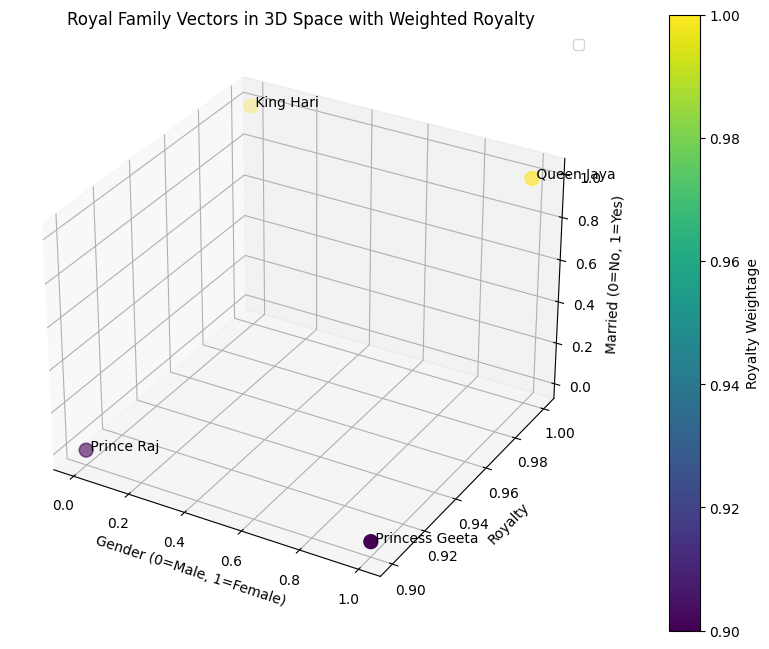

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the vectors with weighted royalty
entities = ['King Hari', 'Queen Jaya', 'Prince Raj', 'Princess Geeta']
vectors = np.array([
    [0, 1.0, 0, 1],  # King Hari: [Gender, Royalty, Siblings, Married]
    [1, 1.0, 0, 1],  # Queen Jaya: [Gender, Royalty, Siblings, Married]
    [0, 0.9, 1, 0],  # Prince Raj: [Gender, Royalty, Siblings, Married]
    [1, 0.9, 1, 0]   # Princess Geeta: [Gender, Royalty, Siblings, Married]
])

# Extract individual dimensions
gender = vectors[:, 0]
royalty = vectors[:, 1]
siblings = vectors[:, 2]
married = vectors[:, 3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each entity in 3D space
scatter = ax.scatter(gender, royalty, married, c=royalty, cmap='viridis', s=100)

# Add labels for each point
for i, entity in enumerate(entities):
    ax.text(gender[i], royalty[i], married[i], f' {entity}', fontsize=10)

# Set axis labels
ax.set_xlabel('Gender (0=Male, 1=Female)')
ax.set_ylabel('Royalty')
ax.set_zlabel('Married (0=No, 1=Yes)')
ax.set_title('Royal Family Vectors in 3D Space with Weighted Royalty')

# Show color bar for royalty dimension
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Royalty Weightage')

# Add an arrow to show the transformation from King Hari to Queen Jaya
king_hari = vectors[0]
queen_jaya = vectors[1]
ax.quiver(king_hari[0], king_hari[1], king_hari[3],
          queen_jaya[0] - king_hari[0],
          queen_jaya[1] - king_hari[1],
          queen_jaya[3] - king_hari[3],
          color='r', arrow_length_ratio=0.1, linewidth=2, label='Transformation')

# Show the legend
ax.legend()

# Show the plot
plt.show()


# A Demo of Static to Contextual Embedding

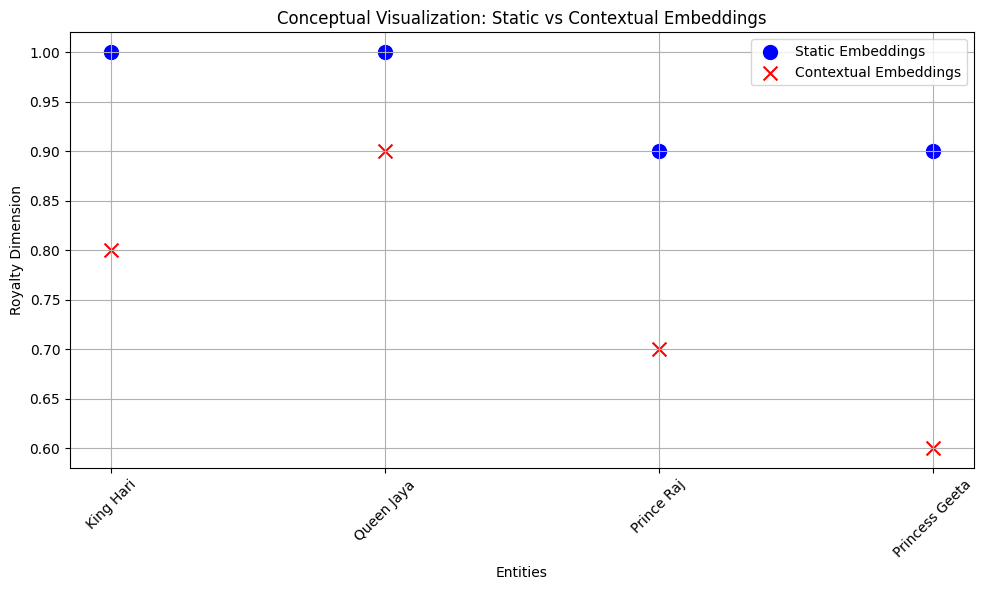

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Example entities and their static embeddings
entities = ['King Hari', 'Queen Jaya', 'Prince Raj', 'Princess Geeta']
static_embeddings = {
    'King Hari': [0, 1.0, 0, 1],    # [Gender, Royalty, Siblings, Married]
    'Queen Jaya': [1, 1.0, 0, 1],   # [Gender, Royalty, Siblings, Married]
    'Prince Raj': [0, 0.9, 1, 0],   # [Gender, Royalty, Siblings, Married]
    'Princess Geeta': [1, 0.9, 1, 0]# [Gender, Royalty, Siblings, Married]
}

# Example sentence (context)
sentence = "King Hari and Queen Jaya ruled the kingdom."

# Hypothetical contextual embeddings (not actual model outputs)
# In practice, these would be generated by a Language Model
contextual_embeddings = {
    'King Hari': [0.2, 0.8, 0.3, 0.9],       # Hypothetical values
    'Queen Jaya': [0.8, 0.9, 0.1, 0.8],      # Hypothetical values
    'Prince Raj': [0.3, 0.7, 0.5, 0.6],      # Hypothetical values
    'Princess Geeta': [0.7, 0.6, 0.4, 0.5]   # Hypothetical values
}

# Extracting dimensions for visualization
x_labels = entities
static_y_values = np.array([static_embeddings[entity] for entity in entities])
contextual_y_values = np.array([contextual_embeddings[entity] for entity in entities])

# Plotting static embeddings
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(x_labels)), static_y_values[:, 1], color='blue', label='Static Embeddings', marker='o', s=100)

# Plotting contextual embeddings
plt.scatter(np.arange(len(x_labels)), contextual_y_values[:, 1], color='red', label='Contextual Embeddings', marker='x', s=100)

# Adding labels and title
plt.xticks(np.arange(len(x_labels)), x_labels, rotation=45)
plt.xlabel('Entities')
plt.ylabel('Royalty Dimension')
plt.title('Conceptual Visualization: Static vs Contextual Embeddings')
plt.legend()

# Adding grid
plt.grid(True)

# Showing plot
plt.tight_layout()
plt.show()


# An Example of Graph Embedding

In [2]:
pip install networkx node2vec


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0

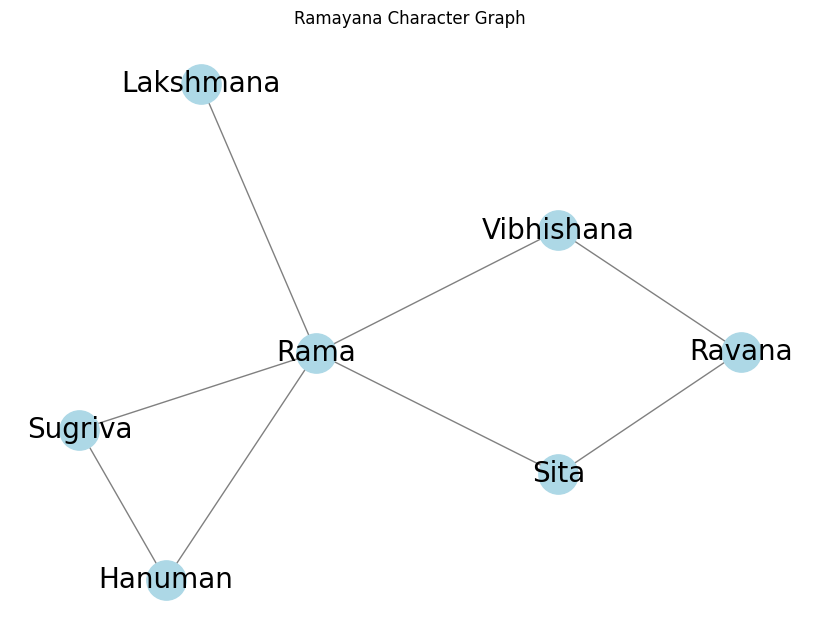

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (characters)
characters = ['Rama', 'Sita', 'Lakshmana', 'Hanuman', 'Ravana', 'Sugriva', 'Vibhishana']
G.add_nodes_from(characters)

# Add edges (relationships)
relationships = [
    ('Rama', 'Sita'),
    ('Rama', 'Lakshmana'),
    ('Rama', 'Hanuman'),
    ('Rama', 'Sugriva'),
    ('Rama', 'Vibhishana'),
    ('Ravana', 'Vibhishana'),
    ('Ravana', 'Sita'),
    ('Sugriva', 'Hanuman')
]
G.add_edges_from(relationships)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_size=20, edge_color='gray')
plt.title('Ramayana Character Graph')
plt.show()


In [4]:
from node2vec import Node2Vec

# Generate walks and learn embeddings
node2vec = Node2Vec(G, dimensions=64, walk_length=10, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get the embedding for a specific character (e.g., Rama)
rama_embedding = model.wv['Rama']

print(f"Embedding for Rama: {rama_embedding}")


Computing transition probabilities:   0%|          | 0/7 [00:00<?, ?it/s]

Embedding for Rama: [-0.03468389 -0.02751275  0.20202786  0.25237963 -0.2035679  -0.229196
  0.20450127  0.32430643 -0.09342749 -0.0225724   0.31764126  0.06082981
  0.03421504  0.09774124 -0.17052397 -0.03365966  0.01985669  0.13391808
 -0.19758613 -0.02778177  0.26445526  0.21835871  0.31642836 -0.1561845
  0.15346736  0.08241699 -0.13907759  0.14867125 -0.12521924 -0.09556085
 -0.11079028 -0.0365551   0.06122019 -0.23590809 -0.061988    0.03497864
  0.13921781 -0.01717541  0.2804317  -0.0711337  -0.05934697  0.11070632
 -0.1236616  -0.14028697 -0.06117103  0.04941773 -0.11465234  0.08172977
 -0.03075749  0.09099578  0.01546148  0.16178839 -0.039729    0.1677025
  0.22267438 -0.14474238  0.09156764 -0.22648337  0.00557411  0.02032273
  0.07417955 -0.09259304 -0.19027965 -0.08244392]


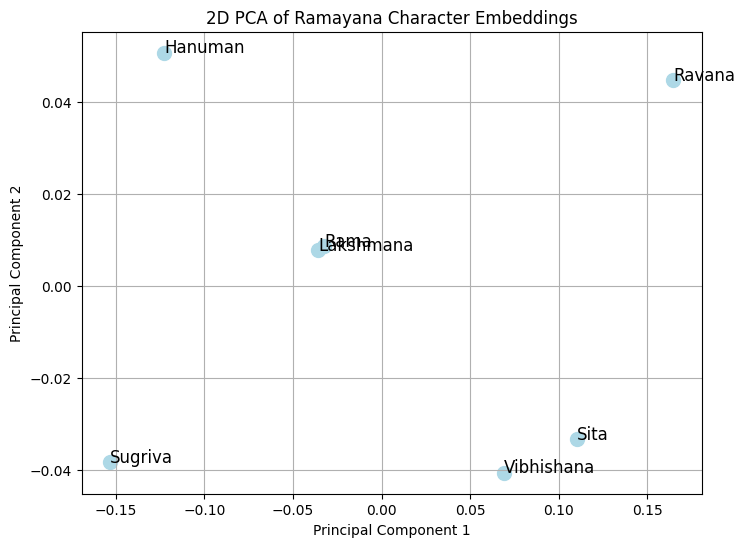

In [5]:
import numpy as np
from sklearn.decomposition import PCA

# Extract all node embeddings and their corresponding node labels
node_ids = list(model.wv.index_to_key)
node_embeddings = np.array([model.wv[node] for node in node_ids])

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
node_embeddings_2d = pca.fit_transform(node_embeddings)

# Plot the node embeddings
plt.figure(figsize=(8, 6))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], c='lightblue', s=100)

for i, node_id in enumerate(node_ids):
    plt.annotate(node_id, (node_embeddings_2d[i, 0], node_embeddings_2d[i, 1]), fontsize=12)

plt.title("2D PCA of Ramayana Character Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()
